In [ ]:
from google.colab import files
uploaderd = files.upload()

Saving submission_file.csv to submission_file.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'train.csv'  # Update this path if your file is located elsewhere
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

          id                                     title   type  \
0  tm1166020                              The Takedown  MOVIE   
1    ts82915                             Sex Education   SHOW   
2   ts258169  Holiday Home Makeover with Mr. Christmas   SHOW   
3   ts223456      Pandemic: How to Prevent an Outbreak   SHOW   
4   tm818239                                   Penalty  MOVIE   

                                         description  release_year  \
0  Plot Unknown, Sequel of On the Other Side of t...          2022   
1  Inexperienced Otis channels his sex therapist ...          2019   
2  Mr. Christmas, a veteran in the interior desig...          2020   
3  In this docuseries, meet the heroes on the fro...          2020   
4  A story of a North-east Indian football player...          2019   

  age_certification  runtime         genres production_countries  seasons  \
0               NaN      119          crime                   FR      NaN   
1             TV-MA       52      

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in 'release_year' and 'imdb_score'
data = data.dropna(subset=['release_year', 'imdb_score'])

# Convert 'release_year' to integer and 'imdb_score' to float
data['release_year'] = data['release_year'].astype(int)
data['imdb_score'] = data['imdb_score'].astype(float)

# Remove duplicates
data = data.drop_duplicates()

# Verify preprocessing
print(data[['release_year', 'imdb_score']].info())

id                         0
title                      1
type                       0
description               16
release_year               0
age_certification       2092
runtime                    0
genres                     0
production_countries       1
seasons                 3001
imdb_id                  348
imdb_score               398
imdb_votes               408
tmdb_popularity           73
tmdb_score               250
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4246 entries, 0 to 4643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  4246 non-null   int64  
 1   imdb_score    4246 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 99.5 KB
None


<ipython-input-3-8f52d88b5634>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_year'] = data['release_year'].astype(int)
<ipython-input-3-8f52d88b5634>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['imdb_score'] = data['imdb_score'].astype(float)


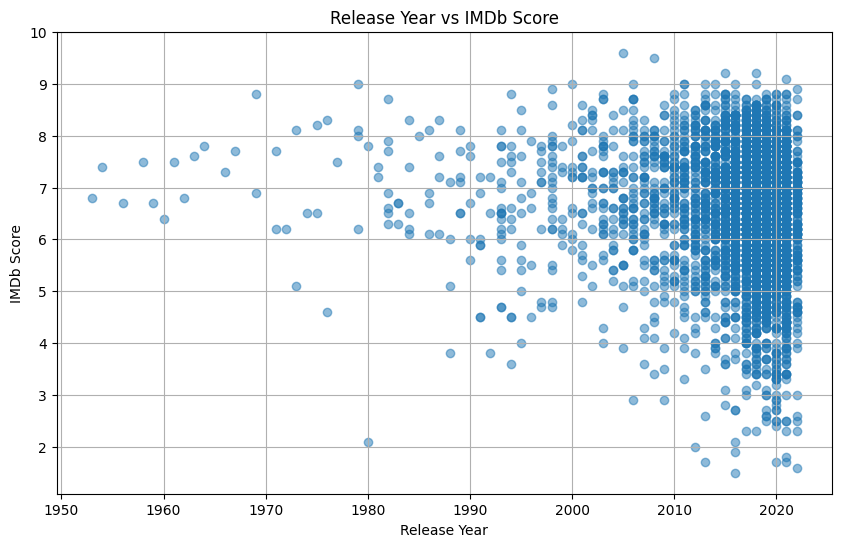

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['release_year'], data['imdb_score'], alpha=0.5)
plt.title('Release Year vs IMDb Score')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

Segment_1: 177 records, Avg IMDb Score: 6.74
Segment_2: 335 records, Avg IMDb Score: 6.77
Segment_3: 3734 records, Avg IMDb Score: 6.49


In [ ]:
# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Display correlations with 'imdb_score'
imdb_correlations = correlation_matrix[].sort_values(ascending=False)
print(imdb_correlations)

imdb_score         1.000000
tmdb_score         0.592409
imdb_votes         0.189443
seasons            0.082364
tmdb_popularity    0.017573
release_year      -0.102567
runtime           -0.150940
Name: imdb_score, dtype: float64


In [ ]:
# Define split points
split_year_1 = 2005
split_year_2 = 2020

# Segment the data
segment_1 = data[(data['release_year'] >= 1950) & (data['release_year'] <= split_year_1)]
segment_2 = data[(data['release_year'] > split_year_1) & (data['release_year'] <= split_year_2)]

# Display basic statistics for each segment
print("Segment 1 (1950-2005):")
print(f"Number of records: {len(segment_1)}")
print(f"Average IMDb Score: {segment_1['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_1['imdb_score'].median():.2f}\n")

print("Segment 2 (2005-2020):")
print(f"Number of records: {len(segment_2)}")
print(f"Average IMDb Score: {segment_2['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_2['imdb_score'].median():.2f}\n")

Segment 1 (1950-2005):
Number of records: 287
Average IMDb Score: 6.77
Median IMDb Score: 6.80

Segment 2 (2005-2020):
Number of records: 3262
Average IMDb Score: 6.55
Median IMDb Score: 6.70



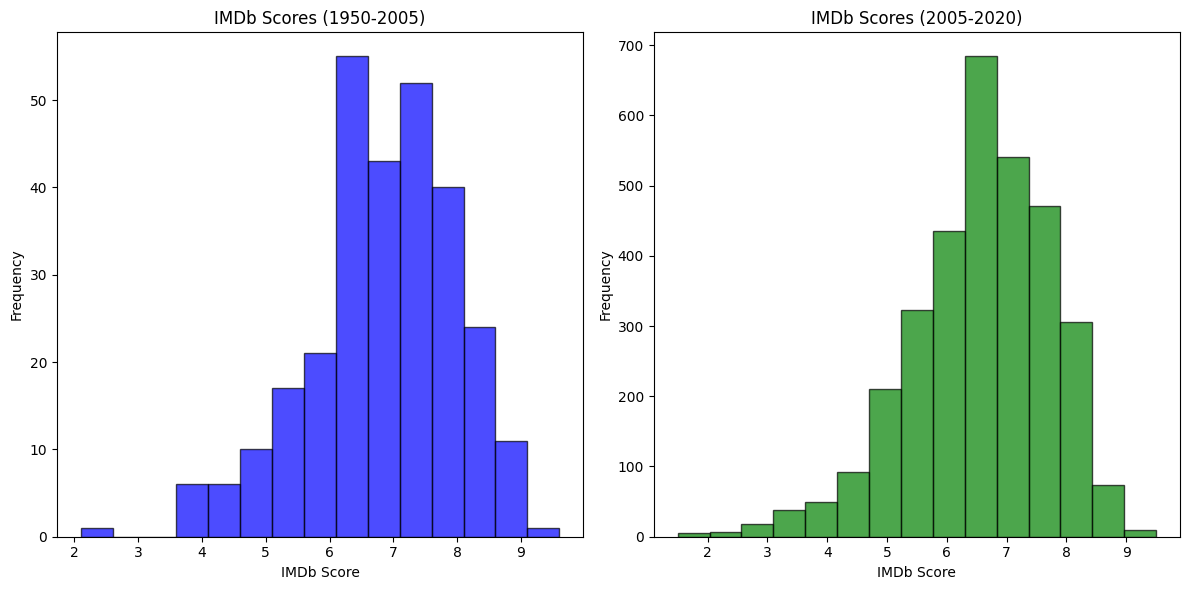

In [ ]:
# Plot histograms for each segment
plt.figure(figsize=(12, 6))

# Segment 1
plt.subplot(1, 2, 1)
plt.hist(segment_1['imdb_score'], bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('IMDb Scores (1950-2005)')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')

# Segment 2
plt.subplot(1, 2, 2)
plt.hist(segment_2['imdb_score'], bins=15, alpha=0.7, color='green', edgecolor='black')
plt.title('IMDb Scores (2005-2020)')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Define runtime split points
runtime_split_1 = 75
runtime_split_2 = 250

# Segment the data
segment_runtime_1 = data[(data['runtime'] >= 0) & (data['runtime'] <= runtime_split_1)]
segment_runtime_2 = data[(data['runtime'] > runtime_split_1) & (data['runtime'] <= runtime_split_2)]

# Display basic statistics for each segment
print("Segment Runtime 1 (0-75 minutes):")
print(f"Number of records: {len(segment_runtime_1)}")
print(f"Average IMDb Score: {segment_runtime_1['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_runtime_1['imdb_score'].median():.2f}\n")

print("Segment Runtime 2 (75-250 minutes):")
print(f"Number of records: {len(segment_runtime_2)}")
print(f"Average IMDb Score: {segment_runtime_2['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_runtime_2['imdb_score'].median():.2f}\n")

Segment Runtime 1 (0-75 minutes):
Number of records: 1861
Average IMDb Score: 6.87
Median IMDb Score: 7.00

Segment Runtime 2 (75-250 minutes):
Number of records: 2385
Average IMDb Score: 6.25
Median IMDb Score: 6.30



<ipython-input-11-c08795c15305>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([segment_runtime_1['imdb_score'], segment_runtime_2['imdb_score']],


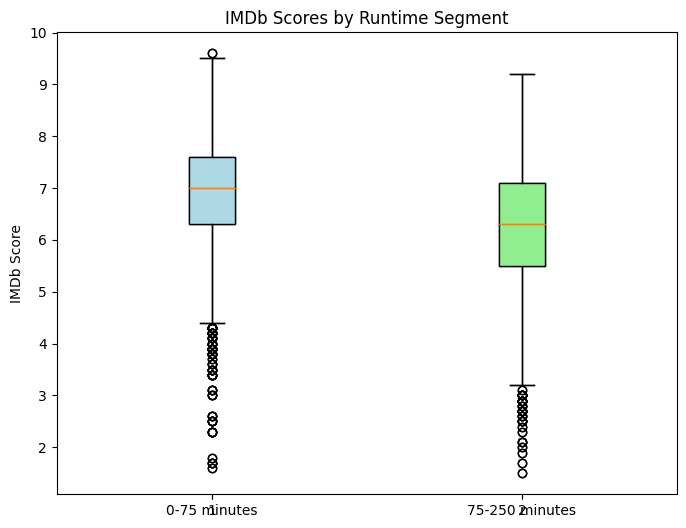

In [ ]:
# Boxplot for both segments
plt.figure(figsize=(8, 6))
plt.boxplot([segment_runtime_1['imdb_score'], segment_runtime_2['imdb_score']],
            labels=['0-75 minutes', '75-250 minutes'], patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(plt.boxplot([segment_runtime_1['imdb_score'], segment_runtime_2['imdb_score']], patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

plt.title('IMDb Scores by Runtime Segment')
plt.ylabel('IMDb Score')
plt.show()

In [ ]:
# Define season split points
season_split_1 = 5
season_split_2 = 42

# Segment the data
segment_season_1 = data[(data['seasons'] >= 1) & (data['seasons'] <= season_split_1)]
segment_season_2 = data[(data['seasons'] > season_split_1) & (data['seasons'] <= season_split_2)]

# Display basic statistics for each segment
print("Segment Seasons 1 (1-5):")
print(f"Number of records: {len(segment_season_1)}")
print(f"Average IMDb Score: {segment_season_1['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_season_1['imdb_score'].median():.2f}\n")

print("Segment Seasons 2 (5-42):")
print(f"Number of records: {len(segment_season_2)}")
print(f"Average IMDb Score: {segment_season_2['imdb_score'].mean():.2f}")
print(f"Median IMDb Score: {segment_season_2['imdb_score'].median():.2f}\n")

Segment Seasons 1 (1-5):
Number of records: 1433
Average IMDb Score: 6.98
Median IMDb Score: 7.10

Segment Seasons 2 (5-42):
Number of records: 82
Average IMDb Score: 7.45
Median IMDb Score: 7.65



<ipython-input-14-fa8531025ab5>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([segment_season_1['imdb_score'], segment_season_2['imdb_score']],


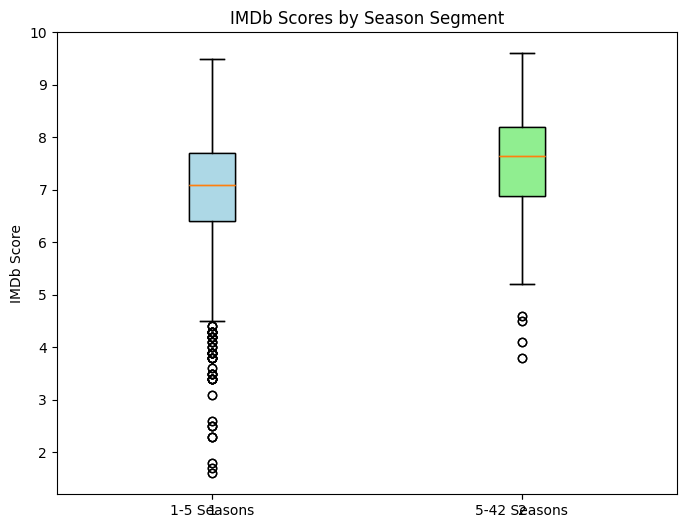

In [ ]:
# Boxplot for both segments
plt.figure(figsize=(8, 6))
plt.boxplot([segment_season_1['imdb_score'], segment_season_2['imdb_score']],
            labels=['1-5 Seasons', '5-42 Seasons'], patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(plt.boxplot([segment_season_1['imdb_score'], segment_season_2['imdb_score']], patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

plt.title('IMDb Scores by Season Segment')
plt.ylabel('IMDb Score')
plt.show()

In [ ]:
# Drop rows with missing values in key columns
data = data.dropna(subset=['imdb_score', 'type'])

# Group by 'type' (MOVIE or SHOW) and calculate the mean IMDb score
mean_scores_by_type = data.groupby('type')['imdb_score'].mean().reset_index()

# Rename columns for clarity
mean_scores_by_type.columns = ['Type', 'Mean IMDb Score']

# Display the grouped data
print(mean_scores_by_type)

    Type  Mean IMDb Score
0  MOVIE         6.256353
1   SHOW         7.000990


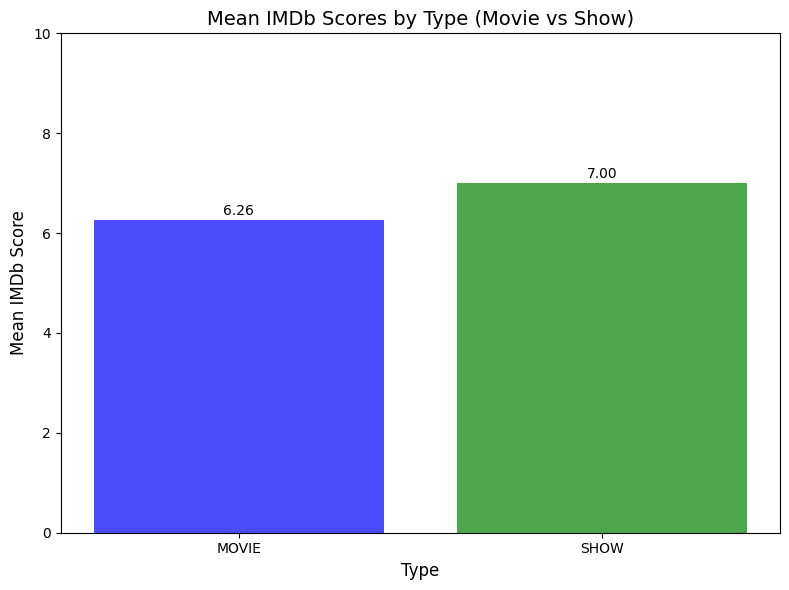

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(mean_scores_by_type['Type'], mean_scores_by_type['Mean IMDb Score'], color=['blue', 'green'], alpha=0.7)

# Add labels and title
plt.title('Mean IMDb Scores by Type (Movie vs Show)', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Mean IMDb Score', fontsize=12)
plt.ylim(0, 10)  # Set y-axis limit to match IMDb score range

# Add value labels on top of bars
for i, value in enumerate(mean_scores_by_type['Mean IMDb Score']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'train.csv'  # Update this path if your file is located elsewhere
data = pd.read_csv(file_path)

# Drop rows with missing values in key columns
data = data.dropna(subset=['release_year', 'imdb_score'])

# Group by 'release_year' and calculate mean IMDb score and total count
mean_rating_by_year = data.groupby('release_year')['imdb_score'].mean()
total_movies_by_year = data['release_year'].value_counts().sort_index()

# Combine the results into a single DataFrame
yearly_data = pd.DataFrame({
    'Mean IMDb Score': mean_rating_by_year,
    'Total Movies/Shows': total_movies_by_year
})

# Display the grouped data
print(yearly_data.head())

              Mean IMDb Score  Total Movies/Shows
release_year                                     
1953                      6.8                   1
1954                      7.4                   1
1956                      6.7                   1
1958                      7.5                   1
1959                      6.7                   1


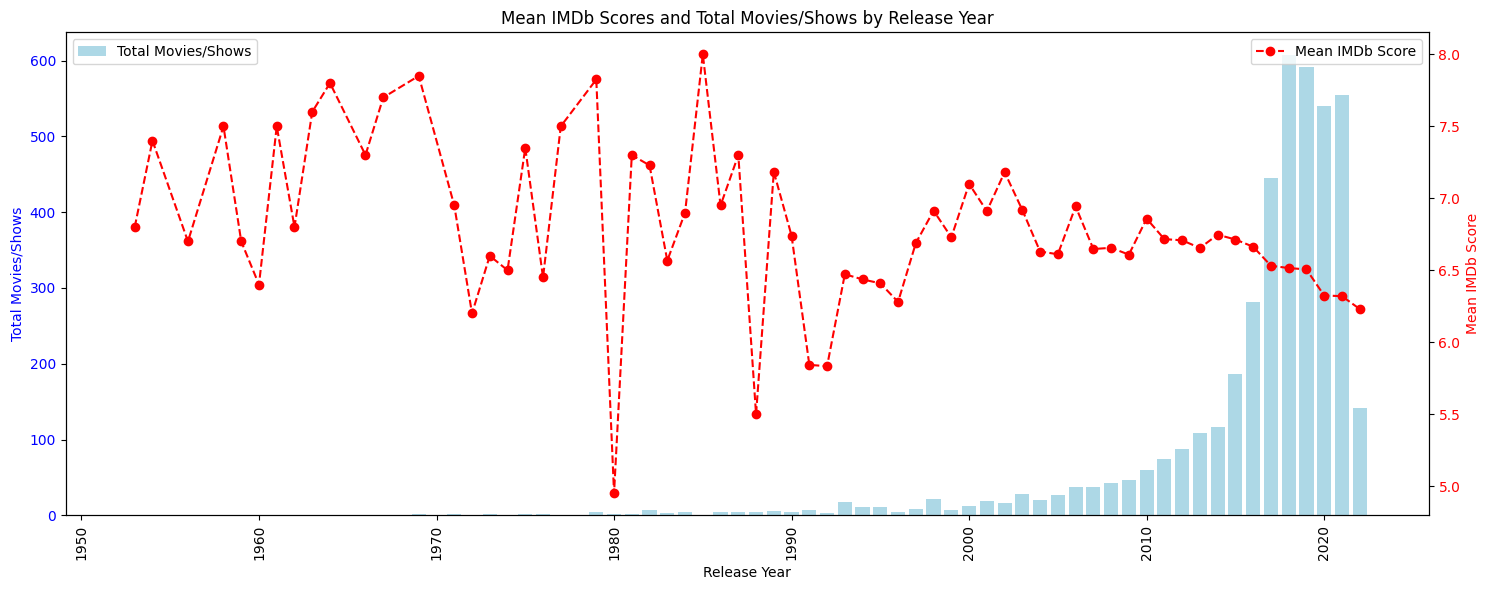

In [ ]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar chart for total movies/shows
ax1.bar(yearly_data.index, yearly_data['Total Movies/Shows'], color='lightblue', label='Total Movies/Shows')
ax1.set_xlabel('Release Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
ax1.set_ylabel('Total Movies/Shows', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for mean IMDb score
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(yearly_data.index, yearly_data['Mean IMDb Score'], color='red', label='Mean IMDb Score', marker='o', linestyle='--')
ax2.set_ylabel('Mean IMDb Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
plt.title('Mean IMDb Scores and Total Movies/Shows by Release Year')
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:


# Drop rows with missing values in key columns
data = data.dropna(subset=['imdb_score', 'production_countries'])

# Split the production_countries column into lists
data['production_countries'] = data['production_countries'].str.split(', ')

In [ ]:
# Explode the production_countries column to create a row for each country
country_counts = data.explode('production_countries')['production_countries'].value_counts()

# Select the top 8 most frequent countries
top_8_countries = country_counts.head(8).index.tolist()

# Display the top 8 countries and their frequencies
print("Top 8 Most Frequent Countries:")
print(country_counts.head(8))

Top 8 Most Frequent Countries:
production_countries
US         1525
IN          476
GB          232
JP          200
KR          157
ES          141
FR          133
Unknown     133
Name: count, dtype: int64


In [ ]:
# Function to assign country groups
def assign_country_group(countries):
    if isinstance(countries, list):
        # Check if any country in the list is in the top 8
        for country in countries:
            if country in top_8_countries:
                return country
    return 'Others'

# Apply the function to create the country_group column
data['country_group'] = data['production_countries'].apply(assign_country_group)

In [ ]:
# Group by country_group and calculate mean IMDb score
mean_scores_by_country = data.groupby('country_group')['imdb_score'].mean().reset_index()

# Sort by mean IMDb score in descending order
mean_scores_by_country = mean_scores_by_country.sort_values(by='imdb_score', ascending=False)

# Display the results
print("\nMean IMDb Scores by Country Group:")
print(mean_scores_by_country)


Mean IMDb Scores by Country Group:
  country_group  imdb_score
5            KR    7.238217
4            JP    7.064000
2            GB    6.889224
7            US    6.539607
3            IN    6.386975
6        Others    6.372458
1            FR    6.347368
0            ES    6.314184
8       Unknown    6.303008


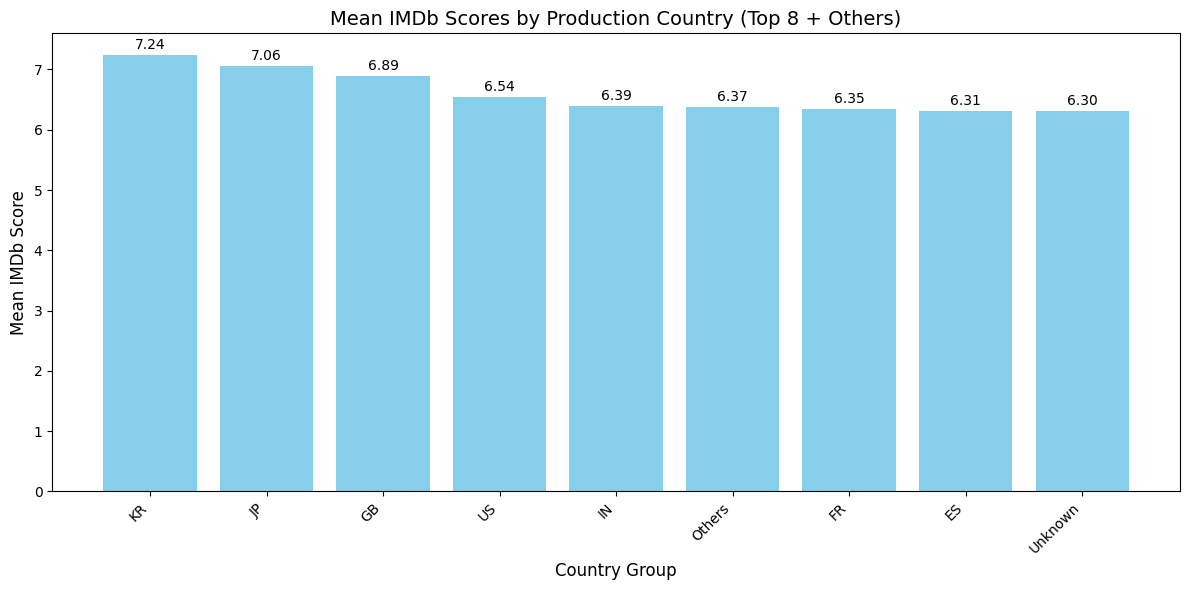

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_scores_by_country['country_group'], mean_scores_by_country['imdb_score'], color='skyblue')

# Add labels and title
plt.title('Mean IMDb Scores by Production Country (Top 8 + Others)', fontsize=14)
plt.xlabel('Country Group', fontsize=12)
plt.ylabel('Mean IMDb Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels on top of bars
for i, value in enumerate(mean_scores_by_country['imdb_score']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Mean IMDb Score by release_year_quantile:
release_year_quantile
(1968.999, 2016.0]    7.340576
(2016.0, 2018.0]      7.064754
(2018.0, 2020.0]      6.891463
(2020.0, 2022.0]      6.702797
Name: imdb_score, dtype: float64

Mean IMDb Score by release_year_custom:
release_year_custom
1950-2000    7.311538
2000-2010    7.424638
2010-2020    7.067639
2020-2023    6.702797
Name: imdb_score, dtype: float64

Mean IMDb Score by seasons_custom:
seasons_custom
0-1     6.921166
1-5     7.090767
5-10    7.590000
10+     6.952381
Name: imdb_score, dtype: float64

Mean IMDb Score by runtime_quantile:
runtime_quantile
(-0.001, 24.0]    6.757746
(24.0, 31.0]      6.914035
(31.0, 44.0]      6.803607
(44.0, 52.0]      7.182927
(52.0, 178.0]     7.510409
Name: imdb_score, dtype: float64

Mean IMDb Score by runtime_custom:
runtime_custom
<60        6.962759
60-90      7.501563
90-120     7.825000
120-180    7.700000
180+            NaN
Name: imdb_score, dtype: float64


<ipython-input-27-5c497f11b0b4>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('release_year_quantile')['imdb_score'].mean())
<ipython-input-27-5c497f11b0b4>:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('release_year_custom')['imdb_score'].mean())
<ipython-input-27-5c497f11b0b4>:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('seasons_custom')['imdb_score

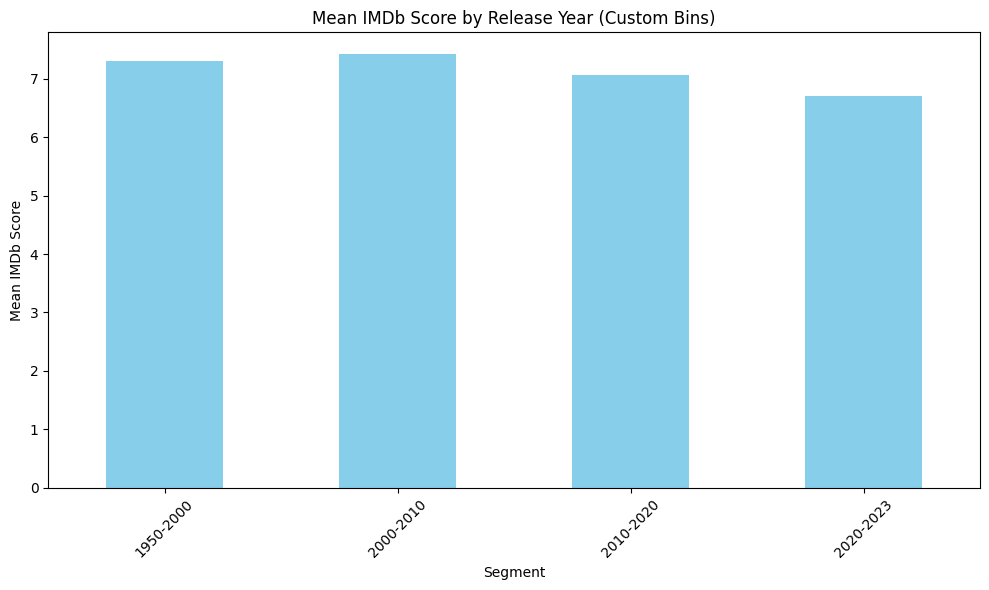

<ipython-input-27-5c497f11b0b4>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_bar_chart(data.groupby('seasons_custom')['imdb_score'].mean(), 'Mean IMDb Score by Seasons (Custom Bins)')


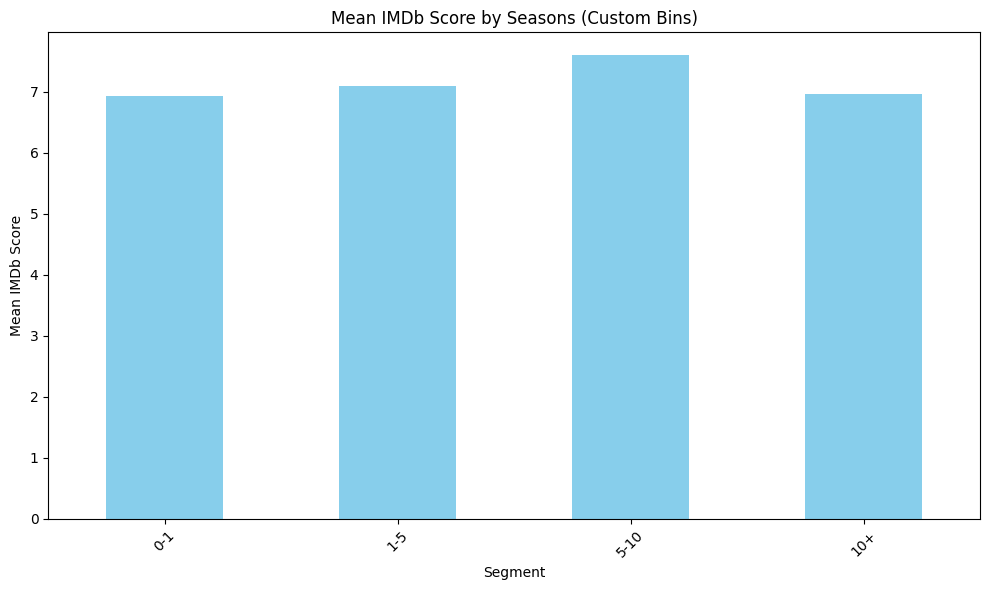

<ipython-input-27-5c497f11b0b4>:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_bar_chart(data.groupby('runtime_custom')['imdb_score'].mean(), 'Mean IMDb Score by Runtime (Custom Bins)')


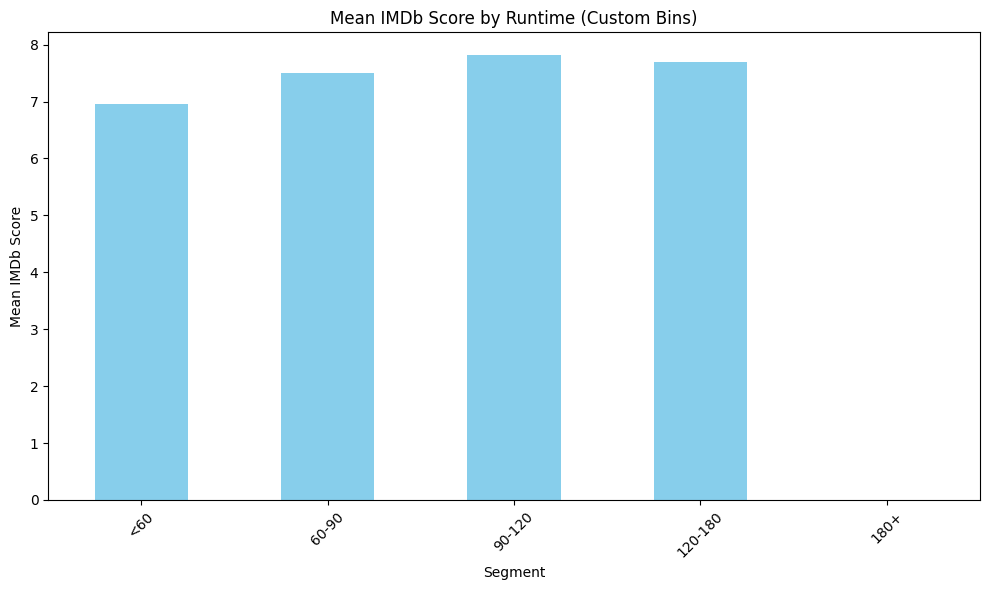

In [27]:
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in key columns
data = data.dropna(subset=['imdb_score', 'release_year', 'seasons', 'runtime'])

# Ensure numerical columns are numeric
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
data['seasons'] = pd.to_numeric(data['seasons'], errors='coerce')

# Drop rows with remaining NaN values
data = data.dropna()

# Step 2: Define binning functions
def quantile_binning(data, column, num_bins):
    """
    Perform quantile-based binning for a numerical column.
    """
    bins = pd.qcut(data[column], q=num_bins, duplicates='drop')  # Drop duplicates to avoid empty bins
    return bins

def custom_binning(data, column, thresholds, labels=None):
    """
    Perform custom threshold-based binning for a numerical column.
    """
    if labels is None:
        labels = [f"{thresholds[i]}-{thresholds[i+1]}" for i in range(len(thresholds)-1)]
    bins = pd.cut(data[column], bins=thresholds, labels=labels, include_lowest=True)
    return bins

# Step 3: Apply binning to each feature
# Release Year Binning
data['release_year_quantile'] = quantile_binning(data, 'release_year', num_bins=4)
release_year_thresholds = [1950, 2000, 2010, 2020, 2023]
release_year_labels = ['1950-2000', '2000-2010', '2010-2020', '2020-2023']
data['release_year_custom'] = custom_binning(data, 'release_year', thresholds=release_year_thresholds, labels=release_year_labels)

# Seasons Binning
seasons_thresholds = [0, 1, 5, 10, 42]  # Example thresholds
seasons_labels = ['0-1', '1-5', '5-10', '10+']
data['seasons_custom'] = custom_binning(data, 'seasons', thresholds=seasons_thresholds, labels=seasons_labels)

# Runtime Binning
data['runtime_quantile'] = quantile_binning(data, 'runtime', num_bins=5)
runtime_thresholds = [0, 60, 90, 120, 180, 300]  # Example thresholds
runtime_labels = ['<60', '60-90', '90-120', '120-180', '180+']
data['runtime_custom'] = custom_binning(data, 'runtime', thresholds=runtime_thresholds, labels=runtime_labels)

# Step 4: Analyze mean IMDb scores for each segment
print("Mean IMDb Score by release_year_quantile:")
print(data.groupby('release_year_quantile')['imdb_score'].mean())

print("\nMean IMDb Score by release_year_custom:")
print(data.groupby('release_year_custom')['imdb_score'].mean())

print("\nMean IMDb Score by seasons_custom:")
print(data.groupby('seasons_custom')['imdb_score'].mean())

print("\nMean IMDb Score by runtime_quantile:")
print(data.groupby('runtime_quantile')['imdb_score'].mean())

print("\nMean IMDb Score by runtime_custom:")
print(data.groupby('runtime_custom')['imdb_score'].mean())

# Step 5: Visualize the results
# Function to plot bar charts
def plot_bar_chart(grouped_data, title):
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Segment')
    plt.ylabel('Mean IMDb Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for release_year_custom
plot_bar_chart(data.groupby('release_year_custom')['imdb_score'].mean(), 'Mean IMDb Score by Release Year (Custom Bins)')

# Plot for seasons_custom
plot_bar_chart(data.groupby('seasons_custom')['imdb_score'].mean(), 'Mean IMDb Score by Seasons (Custom Bins)')

# Plot for runtime_custom
plot_bar_chart(data.groupby('runtime_custom')['imdb_score'].mean(), 'Mean IMDb Score by Runtime (Custom Bins)')